<a href="https://colab.research.google.com/github/ftcorrea/cafecominovacao/blob/main/Analisando_os_Dados_do_Airbnb_(Toronto).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Toronto (Canadá)*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Toronto (Canadá), e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [1]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/canada/on/toronto/2022-03-08/visualisations/listings.csv")

df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44419781,Studio Suite | Business Travel,348430184,Avalon,NaN,Annex,43.67127,-79.39461,Entire home/apt,155,2,34,2022-01-30,1.86,33,308,21,STR-2011-HPXRVK
1,44429201,Beautiful & Cozy One Bedroom Condo In Yorkville!,354808129,Erin,NaN,Annex,43.67142,-79.39487,Entire home/apt,120,30,3,2021-10-31,0.17,7,35,2,NaN
2,44429908,Stylish Roncesvalles Private Suite w/ Tech Extras,37415518,Anthony,NaN,Roncesvalles,43.64055,-79.43939,Entire home/apt,95,3,37,2022-02-04,2.78,1,117,35,STR-2012-FVZBHD
3,44430872,Newly Renovated 2nd floor Suite,358865808,Joe,NaN,Weston-Pellam Park,43.66801,-79.45752,Entire home/apt,115,3,4,2022-01-02,1.08,1,79,4,STR-2110-FXJVHD
4,44433011,"Spacious, Cozy 1 Bedroom Loft in downtown Toronto",20355052,Turgut,NaN,Regent Park,43.65806,-79.35499,Entire home/apt,160,28,0,NaN,NaN,1,29,0,NaN


## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [4]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,44419781,Studio Suite | Business Travel,348430184,Avalon,NaN,Annex,43.67127,-79.39461,Entire home/apt,155,2,34,2022-01-30,1.86,33,308,21,STR-2011-HPXRVK
1,44429201,Beautiful & Cozy One Bedroom Condo In Yorkville!,354808129,Erin,NaN,Annex,43.67142,-79.39487,Entire home/apt,120,30,3,2021-10-31,0.17,7,35,2,NaN
2,44429908,Stylish Roncesvalles Private Suite w/ Tech Extras,37415518,Anthony,NaN,Roncesvalles,43.64055,-79.43939,Entire home/apt,95,3,37,2022-02-04,2.78,1,117,35,STR-2012-FVZBHD
3,44430872,Newly Renovated 2nd floor Suite,358865808,Joe,NaN,Weston-Pellam Park,43.66801,-79.45752,Entire home/apt,115,3,4,2022-01-02,1.08,1,79,4,STR-2110-FXJVHD
4,44433011,"Spacious, Cozy 1 Bedroom Loft in downtown Toronto",20355052,Turgut,NaN,Regent Park,43.65806,-79.35499,Entire home/apt,160,28,0,NaN,NaN,1,29,0,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 15418
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.653457
reviews_per_month                 0.222921
last_review                       0.222921
host_name                         0.000389
name                              0.000130
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
id                                0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

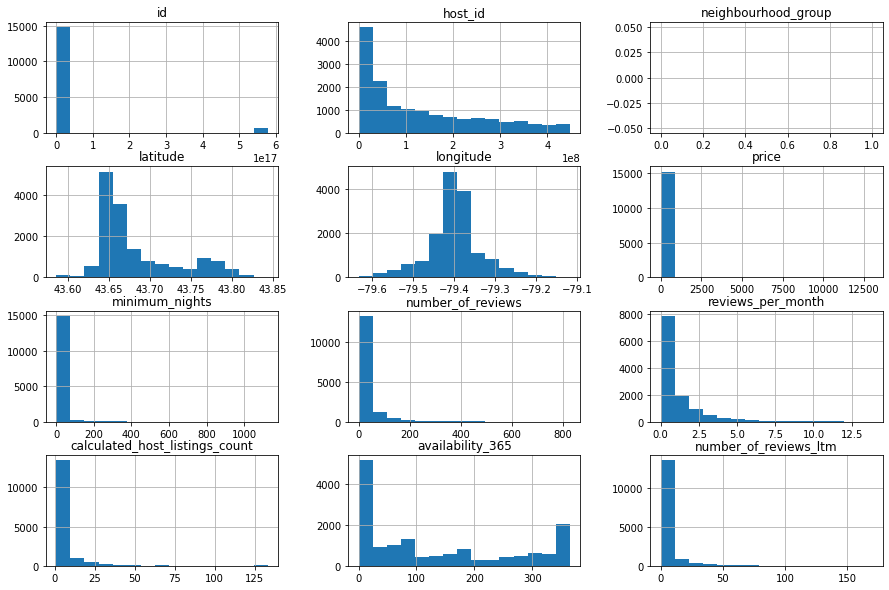

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Q4. Qual a média dos preços de aluguel?**

Média: 159,038656

In [14]:
# ver a média da coluna `price``
df[['price']].describe()


,price
count,15418.000000
mean,159.038656
std,370.090927
min,0.000000
25%,69.000000
50%,106.000000
75%,169.000000
max,13000.000000


### **Q4. Qual a correlação existente entre as variáveis**

In [17]:
# criar uma matriz de correlação
df_clean = df.copy()
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.018863,-0.020297,-0.011878,0.004239,0.017338
minimum_nights,0.018863,1.000000,-0.090606,-0.206056,-0.014290,0.046268
number_of_reviews,-0.020297,-0.090606,1.000000,0.618289,-0.068683,-0.017551
reviews_per_month,-0.011878,-0.206056,0.618289,1.000000,-0.038646,0.045749
calculated_host_listings_count,0.004239,-0.014290,-0.068683,-0.038646,1.000000,0.106819
availability_365,0.017338,0.046268,-0.017551,0.045749,0.106819,1.000000


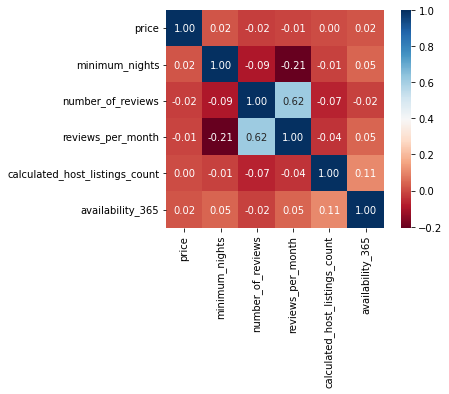

In [18]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [19]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    10277
Private room        4953
Shared room          171
Hotel room            17
Name: room_type, dtype: int64

In [20]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.666559
Private room       0.321248
Shared room        0.011091
Hotel room         0.001103
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara de Toronto?**



In [29]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Annex                                338.668519
Bridle Path-Sunnybrook-York Mills    313.916667
Forest Hill South                    287.320000
Palmerston-Little Italy              279.946154
Rosedale-Moore Park                  230.057143
                                        ...    
Steeles                               61.681159
Pleasant View                         59.142857
Glenfield-Jane Heights                57.114286
Eglinton East                         56.457143
Black Creek                           55.240000
Name: price, Length: 140, dtype: float64

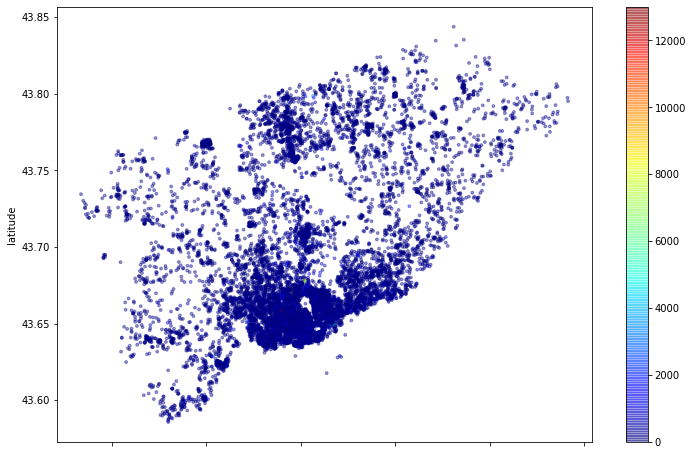

In [22]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [28]:
# ver a média da coluna `minimum_nights``
df.minimum_nights.mean()

25.76008561421715

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb e, neste caso, não foram tratados os *outliers* em nenhuma das variáveis. Para uma análise mais profunda, poderia ser retirado os *outliers* conforme exemplos de causa. 

Também se notou que em algumas localidades há uma concentração bem maior de empreendimentos e também que a variação de preço entre os bairros é muito grande.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.